Dataset: https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv("amazon.csv",encoding="iso-8859-1",parse_dates=['date'])

In [3]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

# 1. Display Top 5 Rows of The Dataset


In [4]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


# 2. Check Last 5 Rows


In [5]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)


In [6]:
data.shape

(6454, 5)

In [7]:
print("Number of rows = ",data.shape[0])
print("Number of columns = ",data.shape[1])

Number of rows =  6454
Number of columns =  5


# 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


# 5. Check For Duplicate Data and Drop Them


In [9]:
data.duplicated().value_counts()

False    6422
True       32
dtype: int64

In [10]:
dup_data= data.duplicated().any()

In [11]:
print("Are there any duplicated values ",dup_data)

Are there any duplicated values  True


In [12]:
data=data.drop_duplicates()

In [13]:
data.shape

(6422, 5)

# 6. Check Null Values In The Dataset


In [14]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

<AxesSubplot:>

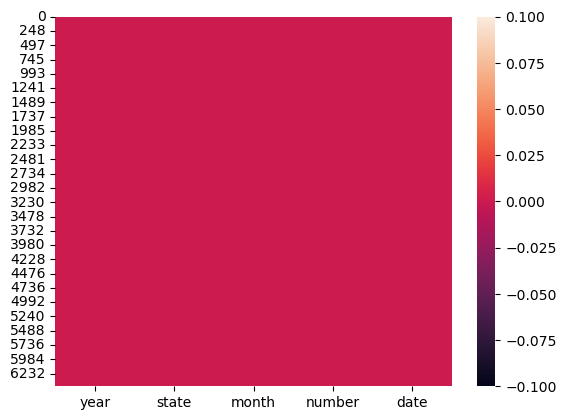

In [15]:
sns.heatmap(data.isnull()) # here we can see there are no null values in this dataset.

# 7. Get Overall Statistics About The Dataframe


In [16]:
data.describe() # here we can see max. number of fire cases is in year 2017

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


# 8. Rename Month Names To English


In [17]:
data['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [18]:
data['month_new']=data['month'].map({'Janeiro':'jan',
                                     'Fevereiro':'feb',
                                     'Março':'march',
                                     'Abril':'april', 
                                     'Maio':'may',
                                     'Junho':'june', 
                                     'Julho':'july',
                                     'Agosto':'aug', 
                                     'Setembro':'sep',
                                     'Outubro':'oct',
                                     'Novembro':'nov',
                                     'Dezembro':'dec'
                                    })


In [21]:
data.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


# 9. Total Number of Fires Registered


In [22]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [23]:
data.shape

(6422, 6)

# 10. In Which Month Maximum Number of Forest Fires Were Reported?


In [24]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [27]:
data1=data.groupby('month_new')['number'].sum().reset_index()

In [28]:
data1

,month_new,number
0,april,28184.770
1,aug,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,july,92319.113
6,june,55997.675
7,march,30709.405
8,may,34725.363
9,nov,85508.054


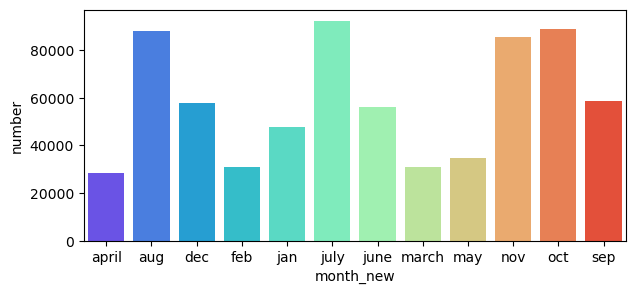

In [49]:
plt.figure(figsize=(7,3))
sns.barplot(x= 'month_new',y='number',data=data1, palette="rainbow")
plt.show()

# 11. In Which Year Maximum Number of Forest Fires Was Reported?


In [50]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [55]:
data2=data.groupby('year')['number'].sum().reset_index()

In [56]:
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<AxesSubplot:xlabel='year', ylabel='number'>

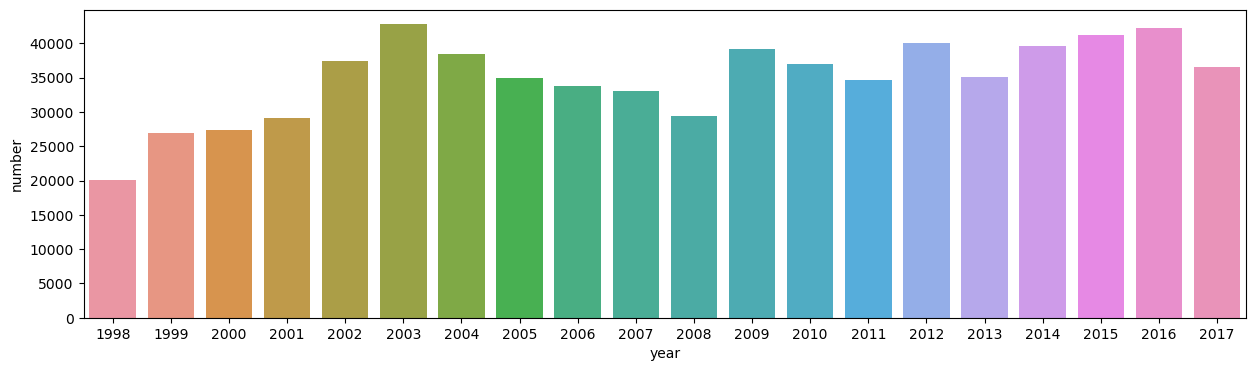

In [60]:
plt.figure(figsize=(15,4))
sns.barplot(x='year',y='number',data=data2)

# 12. In Which State Maximum Number of Forest Fires Was Reported?


In [61]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [65]:
data3=data.groupby('state')['number'].sum().reset_index()

In [76]:
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


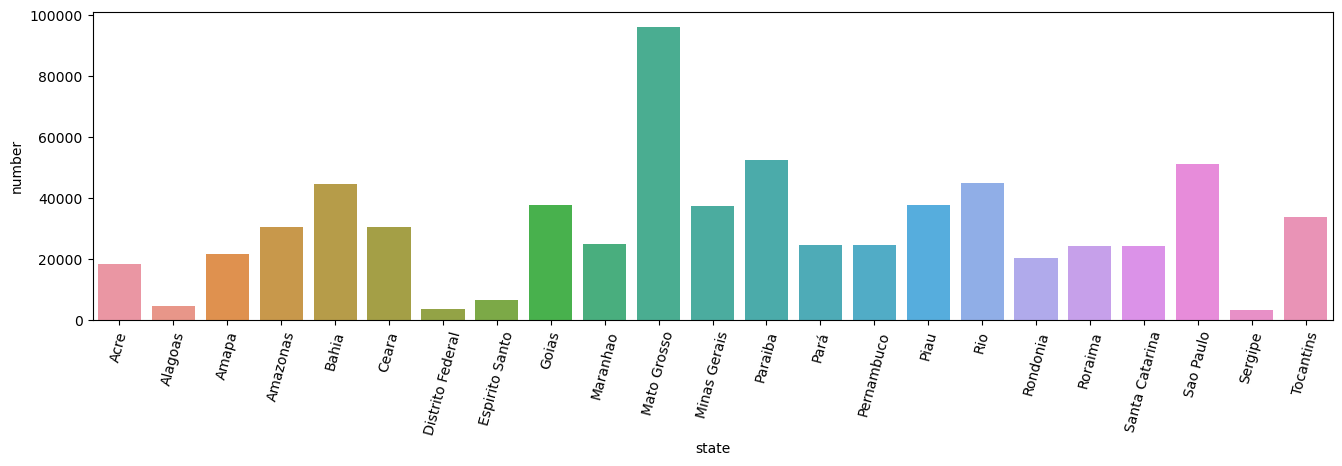

In [79]:
plt.figure(figsize=(16,4))
sns.barplot(x='state',y='number',data=data3)
plt.xticks(rotation=75)
plt.show()

# 13. Find Total Number of Fires Were Reported In Amazonas


In [80]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [85]:
data[data['state']=="Amazonas"]['number'].sum()

30650.129

# 14. Display Number of Fires Were Reported In Amazonas (Year-Wise)


In [86]:
data.columns


Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [100]:
data4=data[data['state']=='Amazonas'].groupby('year')['number'].sum().reset_index()

In [101]:
data4


,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<AxesSubplot:xlabel='year', ylabel='number'>

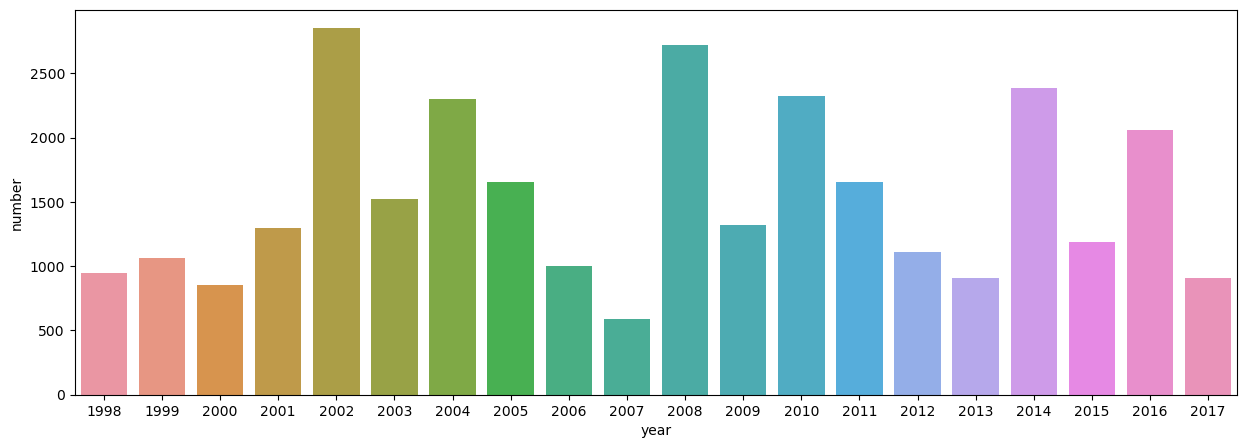

In [104]:
plt.figure(figsize=(15,5))
sns.barplot(x='year',y='number',data=data4)

# 15. Display Number of Fires Were Reported In Amazonas (Day-Wise)


In [105]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [124]:
data5= data[data['state']=='Amazonas']

In [133]:
day=data5.groupby(data5['date'].dt.dayofweek).sum().number

import calendar

day.index=[calendar.day_name[x] for x in range(0,7)]
day=day.reset_index()

In [134]:
day


,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<AxesSubplot:xlabel='index', ylabel='number'>

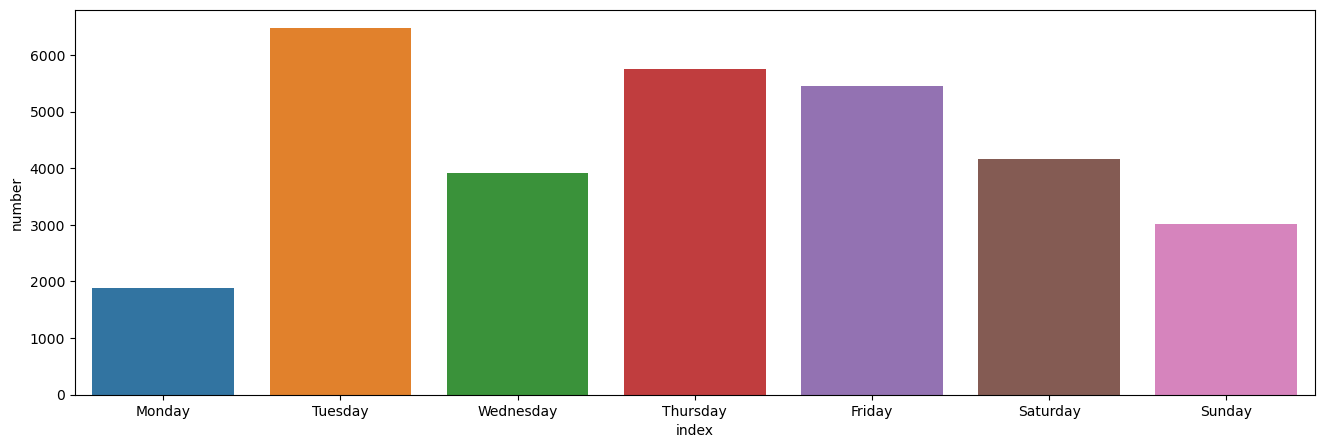

In [136]:
plt.figure(figsize=(16,5))
sns.barplot(x='index',y='number',data=day)


# 16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’


In [137]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [142]:
fire=data[data['year']==2015].groupby('month')['number'].sum().reset_index()


In [143]:
fire

,month,number
0,Abril,2573.000
1,Agosto,4363.125
2,Dezembro,4088.522
3,Fevereiro,2309.000
4,Janeiro,4635.000
5,Julho,4364.392
6,Junho,3260.552
7,Maio,2384.000
8,Março,2202.000
9,Novembro,4034.518


<AxesSubplot:xlabel='month', ylabel='number'>

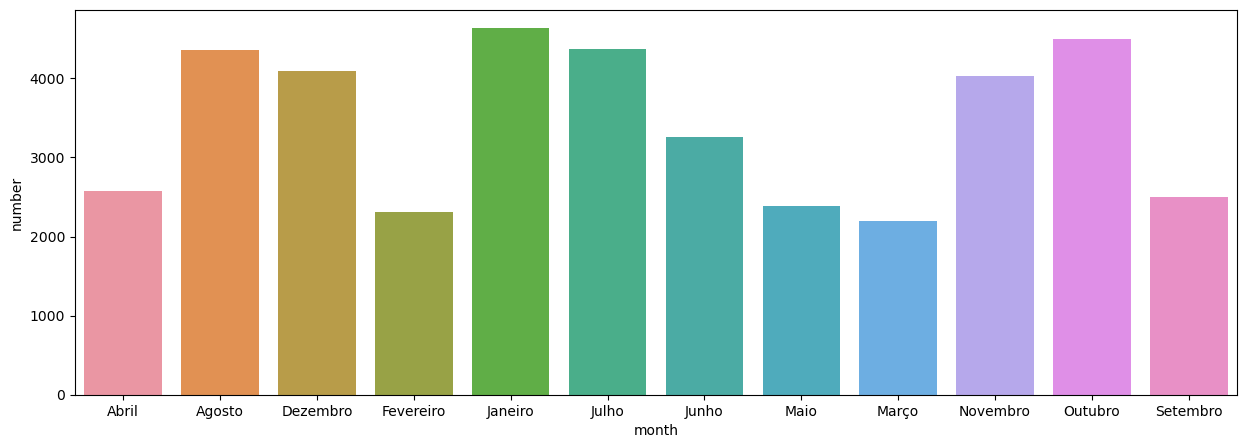

In [146]:
plt.figure(figsize=(15,5))
sns.barplot(x='month',y='number',data=fire)

# 17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)


In [147]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [148]:
data['number'].mean()

108.81517798193724

In [151]:
data7= data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

In [152]:
data7

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


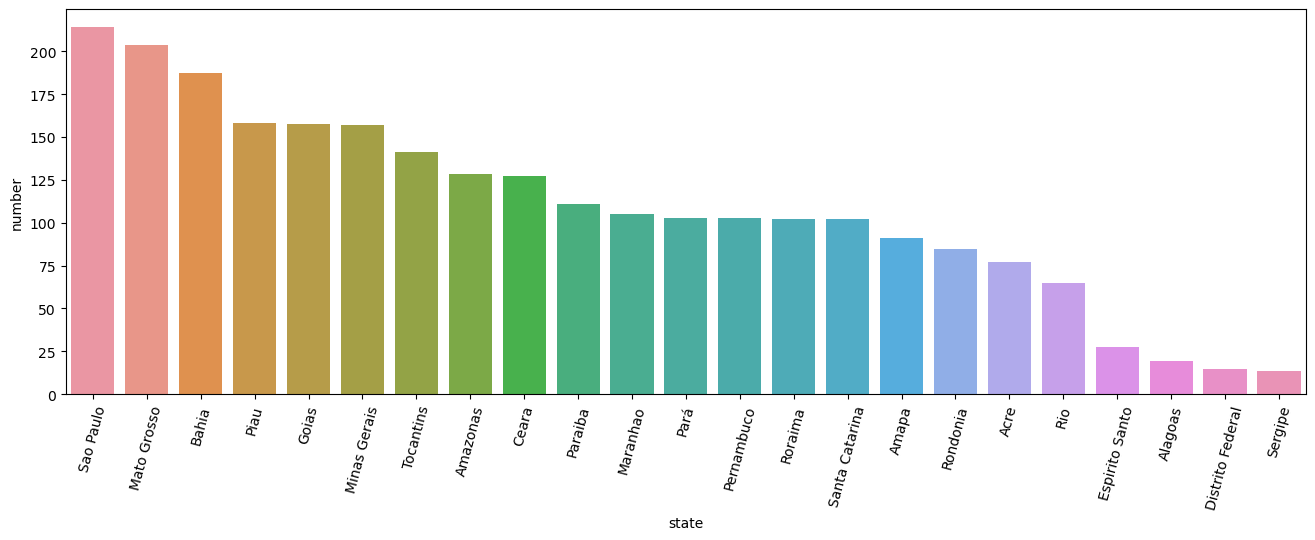

In [155]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=data7)
plt.xticks(rotation=75)
plt.show()

# 18.  To Find The State Names Where Fires Were Reported In 'dec' Month

In [156]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [160]:
data[data['month_new']=='dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)